<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/Hertel_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import codecs
from scipy import stats
import numpy as np

import numpy as np
import scipy
import matplotlib.pyplot as plt
import statistics as stat

import seaborn as sns; sns.set() # sns.set() ==> グラフの見た目をseabornに合わせる
%matplotlib inline

import math


In [3]:
csv1_path = "/content/drive/MyDrive/発表/2022眼科AI学会/result.csv"
csv2_path = "/content/drive/MyDrive/発表/2022眼科AI学会/analysis.csv"

#Open csv
#with codecs.open(csv_path, "r", "Shift-JIS", "ignore") as file:
with codecs.open(csv1_path, "r", "UTF-8", "ignore") as file:
        df = pd.read_csv(file, index_col=None, header=0)

In [ ]:
df

,targets,half_fold0,half_fold1,half_fold2,half_fold3,half_fold4,periocular_fold0,periocular_fold1,periocular_fold2,periocular_fold3,periocular_fold4,eye_fold0,eye_fold1,eye_fold2,eye_fold3,eye_fold4
0,14.0,13.378623,14.685628,13.294028,13.973372,14.123014,14.628881,14.507998,14.967015,13.757207,13.487124,14.274810,14.551019,15.181063,12.912588,13.956070
1,17.0,16.527866,17.420464,18.572323,18.026186,17.614462,16.501270,16.867992,17.573963,17.416254,15.861028,16.626665,15.791635,16.090891,18.066759,16.905663
2,16.0,14.413683,15.394675,13.035702,15.077651,14.736663,15.614464,16.265606,14.597241,16.318535,14.994992,15.825631,17.309702,13.362928,16.382545,16.692049
3,18.0,17.310123,20.631779,17.513378,18.866766,18.291342,17.554770,19.608227,17.574945,17.915594,18.106993,18.756432,20.563534,17.468340,19.188147,18.581377
4,19.0,18.193491,18.763926,18.263947,18.002565,18.582289,18.368830,18.018055,20.731621,18.140236,19.150448,19.392269,19.751122,18.823761,18.247440,18.200075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,19.0,16.332293,18.511236,16.109682,16.466679,17.397280,18.765438,17.932436,17.759705,19.999836,17.882872,20.346523,19.708944,19.171804,22.207342,20.069557
192,17.0,18.421608,19.502392,19.346493,18.655588,20.087976,17.838074,18.120354,18.588303,19.190153,18.343943,18.792059,18.316456,19.379578,19.479605,18.485548
193,16.0,15.132609,16.224701,15.771392,16.424994,15.888462,16.716595,16.471413,16.551378,16.688139,16.680050,15.400311,16.442144,17.395538,16.100853,15.945303
194,20.0,19.492592,22.159861,20.409103,19.957970,20.678410,21.200632,20.790155,18.605188,20.717855,19.788475,18.887751,20.959852,19.780409,18.981382,19.938316


In [33]:
df_fold = pd.DataFrame(index=[], columns=["area", "fold", "error"])

#1行ずつ追加していく方法。時間かかる
# for column in df.columns[1:16]:
#     area = column.split("_")[0]
#     fold = column.split("_")[1]
#     for row in range(len(df)):
#         error = df.loc[row, column]
#         #data= [area, fold, error]
#         data = {
#         'area': area,
#         'fold': fold,
#         'error': error
#         }
#         df_fold = df_fold.append(data, ignore_index=True)               
# df_fold

for column in df.columns[1:16]:
    area = column.split("_")[0]
    fold = column.split("_")[1]
    df_temp = pd.DataFrame(index=[], columns=["area", "fold", "error"])
    df_temp["error"] = df[column]-df["targets"]
    df_temp["fold"] = [fold for i in range(len(df_temp))]
    df_temp["area"] = [area for i in range(len(df_temp))]
    df_fold = pd.concat([df_fold, df_temp])
df_fold

,area,fold,error
0,half,fold0,-0.621377
1,half,fold0,-0.472134
2,half,fold0,-1.586317
3,half,fold0,-0.689877
4,half,fold0,-0.806509
...,...,...,...
191,eye,fold4,1.069557
192,eye,fold4,1.485548
193,eye,fold4,-0.054697
194,eye,fold4,-0.061684


In [34]:
df_ensemble = pd.DataFrame(index=[], columns=["area", "fold", "error"])
df_ensemble["error"] = df.iloc[:,1:16].mean(axis=1) - df["targets"]
df_ensemble["area"] = ["ensemble" for i in range(len(df_ensemble))]
df_ensemble["fold"] = ["ensemble" for i in range(len(df_ensemble))]
df_fold = pd.concat([df_fold, df_ensemble])

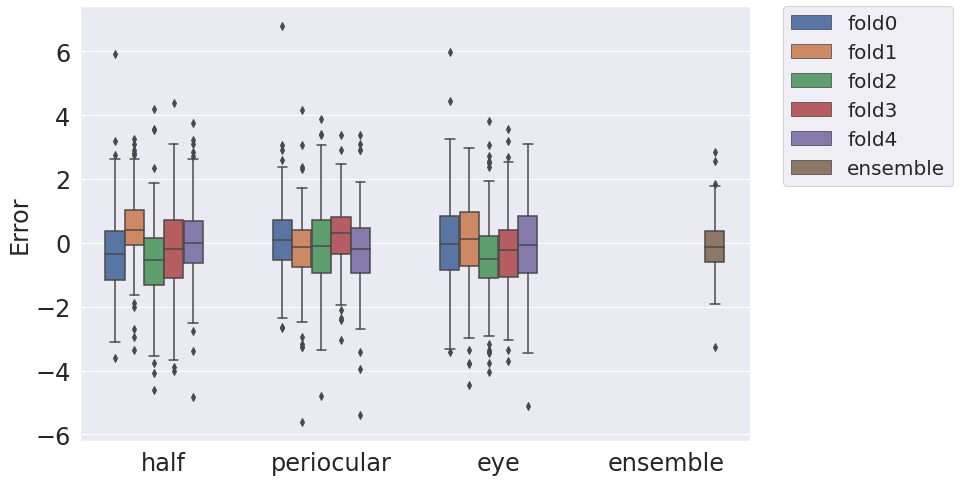

In [35]:
#https://stats.biopapyrus.jp/python/boxplot.html
#横並びのboxplot
plt.figure(figsize=(12,8))

#ボックスプロットを追加
sns.boxplot(x=df_fold["area"], y=df_fold["error"], data=df_fold, width=0.7, hue="fold")
#ドットプロットを追加
#sns.swarmplot(x=df_TM["status"], y=df_TM["mm"],data=df_TM, color="r",order=df_TM.status.unique(), hue="punctum",dodge=True)

plt.title("",fontsize=24)   # タイトルを指定する、文字の大きさを指定
plt.ylabel("Error", fontsize=24)         # ｙ軸のラベルを指定、文字の大きさを指定
plt.xlabel("",fontsize=24)           # ｘ軸のラベルを指定、文字の大きさを指定
#plt.yticks([x*0.2 for x in range(10)])
plt.tick_params(labelsize=24)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize = 20)


plt.show()

In [ ]:
sns.catplotで箱ひげ図を描く
sns.catplot(x='sex', y='age', data=df, kind='box', hue='survived')
plt.show()
